## Import Overview
This project uses several standard Python libraries for data analysis, visualization, and machine learning. Below is a brief explanation of each imported module.

### Core Data and Utilities
- **pandas (pd)**: Data manipulation, DataFrames, CSV/Excel loading.
- **numpy (np)**: Numerical operations, arrays, mathematical functions.
- **os**: Interacting with the operating system and file paths.
- **zipfile**: Extracting and working with compressed ZIP archives.

### Visualization
- **matplotlib.pyplot (plt)**: Core plotting library for line plots, histograms, scatter plots, etc.
- **seaborn (sns)**: Statistical visualization built on top of matplotlib; provides cleaner, higher-level plots.
- **plt.rcParams["figure.figsize"]**: Sets the default size for all plots.

### Machine Learning (scikit-learn)
- **LogisticRegression**: Classification model for predicting categorical outcomes.
- **train_test_split**: Splits data into training and testing sets.
- **accuracy_score, classification_report**: Performance evaluation metrics for classification models.
- **KMeans**: Unsupervised clustering algorithm for grouping data points into clusters.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# ---------------------------
# LEARNING SEGMENT
# ---------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (8, 5)

# Data Loading and Preparation

This section is responsible for **loading the required CSV files** for analysis.  

### Key Points

- **`DATA_DIR`**: The folder where the data files are located. Change if your data folder is elsewhere.  
- **`REQUIRED_FILES`**: The essential CSV files needed for the analysis:
  - `ACC_AUX.CSV` — accident-level data
  - `VEH_AUX.CSV` — vehicle-level data
  - `PER_AUX.CSV` — person-level data  

### Workflow

1. **Check if the data folder exists**.  
2. **Check if the folder is empty**.  
3. **Unzip the first ZIP file found**, if any.  
4. **Recursively search for required CSVs** in a case-insensitive manner.  
5. **Load the CSV files** into pandas DataFrames.  

### Functions

- **`find_in_tree_case_insensitive(filename, root_dir)`**  
  Searches through a folder and all subfolders to find a file that matches `filename` ignoring case. Returns the full path if found, else `None`.

- **`check_and_load_data()`**  
  Executes the workflow above and returns three DataFrames: `acc_df`, `veh_df`, `per_df`. If any required files are missing, it returns `None`.

### Output

- If data is loaded successfully, the first 5 rows of each DataFrame are displayed:
  - **ACC_AUX** — Accident-level data
  - **VEH_AUX** — Vehicle-level data
  - **PER_AUX** — Person-level data


In [19]:
DATA_DIR = "data"  # change if your data folder is elsewhere
REQUIRED_FILES = ["ACC_AUX.CSV", "VEH_AUX.CSV", "PER_AUX.CSV"]


def find_in_tree_case_insensitive(filename, root_dir):
    """
    Walks through root_dir and all subdirectories to find a file
    whose name matches filename (case-insensitive).
    Returns the full path if found, else None.
    """
    target = filename.lower()
    for dirpath, dirnames, filenames in os.walk(root_dir):
        for f in filenames:
            if f.lower() == target:
                return os.path.join(dirpath, f)
    return None


def check_and_load_data():
    print("Working directory:", os.getcwd())
    print("Looking for data folder at:", os.path.abspath(DATA_DIR))

    # 1. Ensure data directory exists
    if not os.path.exists(DATA_DIR):
        print("no data has been given (data folder not found)")
        return None

    files = os.listdir(DATA_DIR)
    print("Top-level entries in data folder:", files)

    # 2. If empty
    if len(files) == 0:
        print("no data has been given (data folder is empty)")
        return None

    # 3. If there's a ZIP file, unzip it (first one we see)
    zip_files = [f for f in files if f.lower().endswith(".zip")]
    if zip_files:
        zip_name = zip_files[0]
        print(f"Found zip file: {zip_name}. Unzipping...")
        zip_path = os.path.join(DATA_DIR, zip_name)
        with zipfile.ZipFile(zip_path, "r") as z:
            z.extractall(DATA_DIR)
        print("Unzipped.")

    # 4. Now search the whole data tree for the required CSVs (case-insensitive)
    found_paths = {}
    for req in REQUIRED_FILES:
        path = find_in_tree_case_insensitive(req, DATA_DIR)
        if path is None:
            print(f"Missing required file (searched recursively): {req}")
            print("no data has been given")
            return None
        else:
            found_paths[req] = path

    print("All required CSV files found at:")
    for logical_name, real_path in found_paths.items():
        print(f"  {logical_name}  -->  {real_path}")

    # 5. Load the dataframes
    print("Loading dataframes...")
    acc_df = pd.read_csv(found_paths["ACC_AUX.CSV"], low_memory=False)
    veh_df = pd.read_csv(found_paths["VEH_AUX.CSV"], low_memory=False)
    per_df = pd.read_csv(found_paths["PER_AUX.CSV"], low_memory=False)
    print("Data successfully loaded.")

    return acc_df, veh_df, per_df

result = check_and_load_data()

if result is None:
    print("No data loaded. Cannot display tables.")
else:
    acc_df, veh_df, per_df = result

    print("ACC_AUX (Accident-level):")
    display(acc_df.head(5))

    print("\nVEH_AUX (Vehicle-level):")
    display(veh_df.head(5))

    print("\nPER_AUX (Person-level):")
    display(per_df.head(5))



Working directory: /home/erf/school/data science/f25-ds-hw-JarvinChavez/final_project
Looking for data folder at: /home/erf/school/data science/f25-ds-hw-JarvinChavez/final_project/data
Top-level entries in data folder: ['FARS2023NationalAuxiliaryCSV', 'FARS2023NationalAuxiliaryCSV.zip']
Found zip file: FARS2023NationalAuxiliaryCSV.zip. Unzipping...
Unzipped.
All required CSV files found at:
  ACC_AUX.CSV  -->  data/FARS2023NationalAuxiliaryCSV/acc_aux.csv
  VEH_AUX.CSV  -->  data/FARS2023NationalAuxiliaryCSV/veh_aux.csv
  PER_AUX.CSV  -->  data/FARS2023NationalAuxiliaryCSV/per_aux.csv
Loading dataframes...
Data successfully loaded.
ACC_AUX (Accident-level):


,YEAR,STATE,ST_CASE,FATALS,A_CRAINJ,A_REGION,A_RU,A_INTER,A_RELRD,A_INTSEC,...,A_RD,A_HR,A_DIST,A_DROWSY,A_WRONGWAY,BIA,SPJ_INDIAN,INDIAN_RES,CENSUS_2020_TRACT_FIPS,TRACT
0,2023,1,10001,1,1,4,1,2,4,2,...,1,2,2,1,2,0,0,0,1.013953e+09,1
1,2023,1,10002,1,1,4,1,2,4,2,...,1,2,2,2,2,0,0,0,1.097007e+09,1
2,2023,1,10003,1,1,4,1,2,4,2,...,1,2,2,2,2,0,0,0,1.089010e+09,1
3,2023,1,10004,1,1,4,1,2,4,2,...,1,2,2,2,2,0,0,0,1.053970e+09,1
4,2023,1,10005,1,1,4,1,1,4,2,...,1,2,2,2,2,0,0,0,1.003010e+09,1



VEH_AUX (Vehicle-level):


,YEAR,STATE,ST_CASE,VEH_NO,A_WRONGWAYDRV,A_DRDIS,A_DRDRO,A_VRD,A_BODY,A_IMP1,A_VROLL,A_LIC_S,A_LIC_C,A_CDL_S,A_MC_L_S,A_SPVEH,A_SBUS,A_MOD_YR,A_FIRE_EXP
0,2023,1,10001,1,2,2,1,1,3,1,1,1,1,2,4,2,3,1996,1
1,2023,1,10002,1,2,2,2,1,1,2,2,1,1,2,4,2,3,2010,1
2,2023,1,10003,1,2,2,2,1,1,2,2,1,1,2,4,1,3,2006,1
3,2023,1,10004,1,2,2,2,1,3,7,2,1,1,2,4,1,3,2018,1
4,2023,1,10005,1,2,2,2,1,1,4,2,2,2,2,4,1,3,1996,1



PER_AUX (Person-level):


,A_AGE1,A_AGE2,A_AGE3,A_AGE4,A_AGE5,A_AGE6,A_AGE7,A_AGE8,A_AGE9,STATE,...,A_RESTUSE,A_HELMUSE,A_ALCTES,A_HISP,A_RCAT,A_HRACE,A_EJECT,A_PERINJ,A_LOC,A_DOA
0,3,4,7,4,4,4,6,3,2,1,...,1,4,3,1,2,3,1,1,1,1
1,3,4,7,4,4,4,6,3,2,1,...,2,4,2,1,1,2,1,1,1,1
2,2,3,6,3,3,3,5,2,2,1,...,2,4,2,1,1,2,1,1,1,1
3,3,5,9,6,6,6,8,5,2,1,...,1,4,2,0,0,0,1,6,1,5
4,3,5,9,6,6,6,8,5,2,1,...,1,4,3,0,0,0,1,6,1,5


# Alcohol Involvement Label

This section creates a binary label **`alcohol_involved`** at the accident level and prepares features for modeling.  

### Steps

1. **Driver Filtering**  
   - Keep only driver rows (`A_PTYPE = 1`) from `PER_AUX`.  

2. **Alcohol Flag (Driver-level)**  
   - Use `A_ALCTES` to flag alcohol involvement: `1` if alcohol detected, else `0`.  

3. **Accident-level Aggregation**  
   - If any driver in an accident had alcohol, mark the accident as `alcohol_involved = 1`.  

4. **Accident Features**  
   - Select relevant columns from `ACC_AUX`:  
     - `A_TOD` → time of day  
     - `A_WEATHER` → weather conditions  
     - `A_ROADFC` → road functional class  
   - Map codes to readable categories (`day/night/unknown`).  
   - Convert weather and road type to categorical strings.  

5. **Merge Alcohol Info**  
   - Combine accident-level alcohol label with accident features.  
   - Fill missing alcohol data with `0`.  

6. **Prepare Modeling Data**  
   - `X` → dummy-coded categorical predictors (`time_of_day`, `weather_cat`, `road_cat`)  
   - `y` → target variable `alcohol_involved`  

**Result:**  
- `df_final` → accident-level dataset with alcohol label and features.  
- `X` and `y` → ready for supervised learning models.

In [11]:
# 1. Filter to driver rows in PER_AUX
#    In your PER_AUX, A_PTYPE is the person type; 1 = driver (aggregated code)
drivers = per_df[per_df["A_PTYPE"] == 1].copy()

# 2. Use the alcohol-related column from PER_AUX
#    From your file, this is A_ALCTES (aggregated alcohol test/info variable)
alcohol_col = "A_ALCTES"

# NOTE: Mapping depends on FARS codebook; here we assume codes 1 or 2 mean alcohol involvement.
# Adjust this list [1, 2] if your instructor/codebook defines it differently.
drivers["alcohol_flag"] = drivers[alcohol_col].apply(
    lambda x: 1 if x in [1, 2] else 0
)

# 3. Collapse driver-level info to accident-level:
#    If ANY driver in an accident has alcohol_flag = 1, the crash is alcohol_involved = 1
alcohol_by_accident = (
    drivers.groupby("ST_CASE")["alcohol_flag"]
           .max()
           .reset_index()
           .rename(columns={"alcohol_flag": "alcohol_involved"})
)

# 4. Pull only the accident-level columns needed for time, weather, road type
#    In your ACC_AUX, you have:
#      - A_TOD     : time of day (aggregated category)
#      - A_WEATHER : weather category
#      - A_ROADFC  : road functional class
cluster_cols = ["ST_CASE", "A_TOD", "A_WEATHER", "A_ROADFC"]
df_acc = acc_df[cluster_cols].copy()

# 5. Map time-of-day codes into simple categories
#    This mapping is an assumption; adjust if your FARS docs say otherwise.
tod_map = {
    1: "day",
    2: "night",
    3: "unknown"
}
df_acc["time_of_day"] = df_acc["A_TOD"].map(tod_map).fillna("unknown")

# 6. Treat weather and road function as categorical strings
df_acc["weather_cat"] = df_acc["A_WEATHER"].astype(str)
df_acc["road_cat"] = df_acc["A_ROADFC"].astype(str)

# 7. Merge accident-level alcohol info into the accident table
df_final = df_acc.merge(alcohol_by_accident, on="ST_CASE", how="left")

# Missing alcohol info -> assume no documented alcohol involvement (0)
df_final["alcohol_involved"] = df_final["alcohol_involved"].fillna(0).astype(int)

# 8. Keep ONLY the columns needed for both tasks
df_final = df_final[[
    "ST_CASE",
    "alcohol_involved",
    "time_of_day",
    "weather_cat",
    "road_cat"
]]

# 9. Show the top 20 rows of the final unified table
print("Final unified table (df_final) – top 20 rows:")
display(df_final.head(20))

# 10. Build X and y for supervised learning ("Was alcohol involved?")
X = pd.get_dummies(df_final[["time_of_day", "weather_cat", "road_cat"]], drop_first=True)
y = df_final["alcohol_involved"]

print("\nShapes:")
print("X:", X.shape)
print("y:", y.shape)

Final unified table (df_final) – top 20 rows:


,ST_CASE,alcohol_involved,time_of_day,weather_cat,road_cat
0,10001,0,night,1,5
1,10002,1,night,1,6
2,10003,1,night,1,5
3,10004,1,night,2,6
4,10005,1,day,2,1
5,10006,0,night,1,6
6,10007,1,night,1,5
7,10008,1,day,1,5
8,10009,1,night,1,3
9,10010,1,night,1,5



Shapes:
X: (37654, 19)
y: (37654,)


# Supervised Learning: Predicting Alcohol Involvement

This section trains a **Logistic Regression** model to predict whether alcohol was involved in a crash (`alcohol_involved`).

### Workflow

1. **Prepare Features and Target**  
   - `X` → dummy-coded categorical predictors (`time_of_day`, `weather_cat`, `road_cat`)  
   - `y` → target variable `alcohol_involved`  

2. **Train/Test Split**  
   - Split data into 75% training and 25% testing sets  
   - Stratified by `y` to maintain class distribution  

3. **Model Training**  
   - Fit a Logistic Regression classifier (`max_iter=2000`) on the training data  

4. **Prediction and Evaluation**  
   - Predict on the test set  
   - Evaluate using **accuracy** and a **classification report**  

5. **Feature Importance**  
   - Examine model coefficients to see which features are most strongly associated with alcohol involvement  
   - Higher coefficient → more likely alcohol involvement  

### Outcome

- `y_pred` → predicted labels for the test set  
- Performance metrics → accuracy, precision, recall, F1-score  
- `coeffs` → feature importance table showing impact of each predictor

In [12]:
# ---------------------------
# SUPERVISED LEARNING SEGMENT
# ---------------------------

# 1. Prepare features (X) and target (y)
X = pd.get_dummies(df_final[["time_of_day", "weather_cat", "road_cat"]], drop_first=True)
y = df_final["alcohol_involved"]

print("Feature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts())

# 2. Split into training/testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. Train Logistic Regression classifier
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate performance
print("\n--- MODEL PERFORMANCE ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6. Display feature importance (coefficients)
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\n--- FEATURE IMPORTANCE (Higher = more likely alcohol involvement) ---")
display(coeffs)


Feature matrix shape: (37654, 19)
Target distribution:
 alcohol_involved
0    19318
1    18336
Name: count, dtype: int64

--- MODEL PERFORMANCE ---
Accuracy: 0.5291055874229871

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.61      4830
           1       0.53      0.32      0.40      4584

    accuracy                           0.53      9414
   macro avg       0.53      0.52      0.51      9414
weighted avg       0.53      0.53      0.51      9414


--- FEATURE IMPORTANCE (Higher = more likely alcohol involvement) ---


,Feature,Coefficient
10,weather_cat_4,0.358744
11,weather_cat_6,0.338570
6,weather_cat_14,0.284086
7,weather_cat_15,0.210151
16,road_cat_5,0.094880
5,weather_cat_13,0.080123
12,weather_cat_99,0.011311
2,weather_cat_10,0.007800
13,road_cat_2,0.006162
3,weather_cat_11,-0.065663


# Unsupervised Learning: Clustering Crashes

This section performs **K-Means clustering** on accident-level features to identify patterns in crashes.

### Workflow

1. **Feature Matrix for Clustering**  
   - Use dummy-coded variables for:  
     - `time_of_day`  
     - `weather_cat`  
     - `road_cat`  

2. **Choose Number of Clusters (`k`)**  
   - Set `k = 4` (experiment with 3–5 for interpretability)  
   - Fit a K-Means model on the feature matrix  

3. **Attach Cluster Labels**  
   - Assign the resulting cluster labels back to `df_final`  

4. **Cluster Sizes**  
   - Examine the number of crashes in each cluster  

5. **Cluster Profiles**  
   - Compare clusters by categorical features:  
     - `time_of_day`  
     - `weather_cat`  
     - `road_cat`  
   - Use cross-tabulations to understand cluster characteristics  

### Outcome

- `df_final["cluster"]` → cluster label for each accident  
- Insights into patterns of crashes by time, weather, and road type  
- Can inform feature engineering or segmentation analyses


In [20]:
# ----------------------------
# UNSUPERVISED LEARNING SEGMENT
# ----------------------------

# 1. Build feature matrix for clustering
#    We use the same three variables: time_of_day, weather_cat, road_cat
X_clust = pd.get_dummies(df_final[["time_of_day", "weather_cat", "road_cat"]])

print("Clustering feature matrix shape:", X_clust.shape)

# 2. Choose number of clusters (you can change this)
k = 4  # try 3, 4, 5 and see which gives more interpretable clusters

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clust)

# 3. Attach cluster labels back to df_final
df_final["cluster"] = clusters

# 4. Basic cluster sizes
print("\n--- Cluster sizes (number of crashes per cluster) ---")
print(df_final["cluster"].value_counts().sort_index())

# 5. Cluster profiles: how they differ by time_of_day, weather, road_cat
print("\n--- Cluster by time_of_day (row = cluster, columns = time_of_day counts) ---")
display(pd.crosstab(df_final["cluster"], df_final["time_of_day"]))

print("\n--- Cluster by weather_cat (row = cluster, columns = weather code counts) ---")
display(pd.crosstab(df_final["cluster"], df_final["weather_cat"]))

print("\n--- Cluster by road_cat (row = cluster, columns = road code counts) ---")
display(pd.crosstab(df_final["cluster"], df_final["road_cat"]))


Clustering feature matrix shape: (37654, 22)

--- Cluster sizes (number of crashes per cluster) ---
cluster
0     5075
1     5153
2    15452
3    11974
Name: count, dtype: int64

--- Cluster by time_of_day (row = cluster, columns = time_of_day counts) ---


time_of_day,day,night,unknown
cluster,,,
0,0,4951,124
1,5112,0,41
2,0,15402,50
3,11907,0,67



--- Cluster by weather_cat (row = cluster, columns = weather code counts) ---


weather_cat,1,10,11,12,13,14,15,2,3,4,6,99
cluster,,,,,,,,,,,,
0,0,14,0,20,2349,16,7,1496,14,107,242,810
1,3742,7,2,4,771,6,4,360,9,36,43,169
2,15452,0,0,0,0,0,0,0,0,0,0,0
3,8678,23,7,11,1748,14,6,794,22,79,114,478



--- Cluster by road_cat (row = cluster, columns = road code counts) ---


road_cat,1,2,3,4,5,6,7
cluster,,,,,,,
0,702,227,1468,1146,928,544,60
1,0,0,5153,0,0,0,0
2,2096,713,4751,3401,2765,1607,119
3,1750,559,0,4085,3644,1785,151


In [14]:
print("Alcohol involvement counts:")
print(df_final["alcohol_involved"].value_counts())

print("\nTime of day distribution:")
print(df_final["time_of_day"].value_counts())

print("\nWeather distribution:")
print(df_final["weather_cat"].value_counts())

print("\nRoad category distribution:")
print(df_final["road_cat"].value_counts())


Alcohol involvement counts:
alcohol_involved
0    19318
1    18336
Name: count, dtype: int64

Time of day distribution:
time_of_day
night      20353
day        17019
unknown      282
Name: count, dtype: int64

Weather distribution:
weather_cat
1     27872
13     4868
2      2650
99     1457
6       399
4       222
3        45
10       44
14       36
12       35
15       17
11        9
Name: count, dtype: int64

Road category distribution:
road_cat
3    11372
4     8632
5     7337
1     4548
6     3936
2     1499
7      330
Name: count, dtype: int64


# Data Visualization: Accident-Level Features

This section creates **count plots** to visualize distributions of key variables in the accident dataset.

### Plots

1. **Alcohol Involvement**  
   - Distribution of the binary target `alcohol_involved`  
   - Shows how many accidents involved alcohol versus not  

2. **Time of Day**  
   - Distribution across `time_of_day` categories (`day`, `night`, `unknown`)  
   - Helps identify patterns in accidents by time  

3. **Weather Conditions**  
   - Distribution across `weather_cat` categories  
   - Visualizes how weather affects accident occurrences  

### Notes

- Bars are annotated with counts for clarity  
- `sns.countplot` from Seaborn is used for consistent, clean visualization  
- Axis labels, titles, and rotation applied for readability  


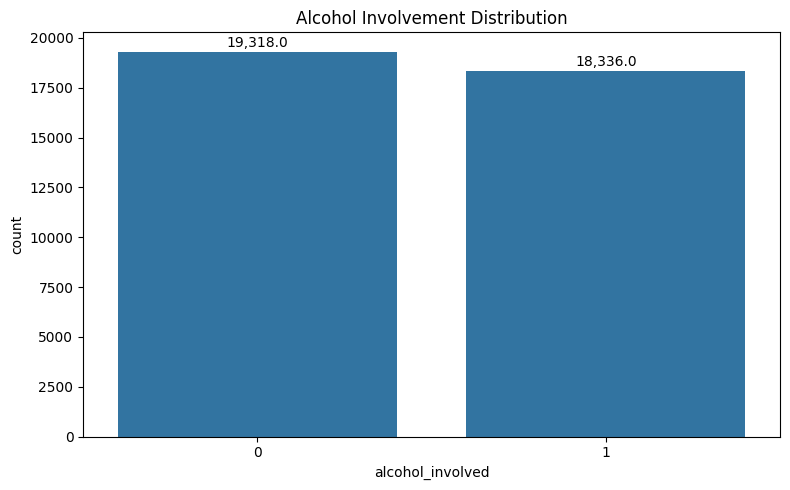

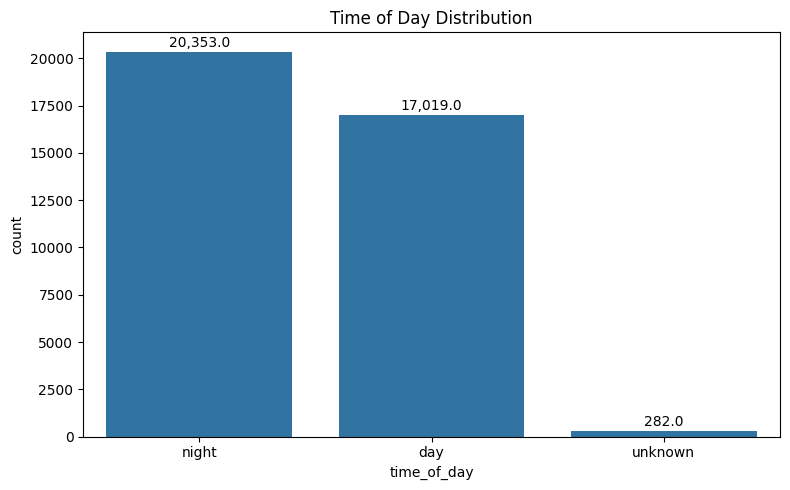

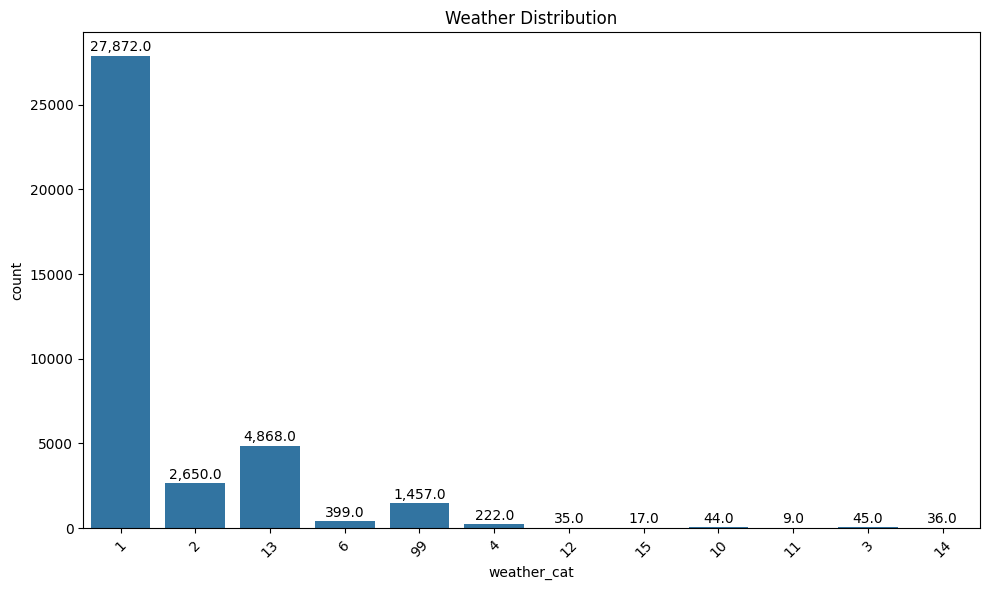

In [15]:
# ------------------------------
# 1. Alcohol Involvement Plot
# ------------------------------
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_final, x="alcohol_involved")
plt.title("Alcohol Involvement Distribution")

# annotate bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 100,
        f"{height:,}",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


# ------------------------------
# 2. Time of Day Plot
# ------------------------------
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_final, x="time_of_day")
plt.title("Time of Day Distribution")

# annotate bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 100,
        f"{height:,}",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


# ------------------------------
# 3. Weather Distribution Plot
# ------------------------------
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_final, x="weather_cat")
plt.title("Weather Distribution")

# annotate bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 100,
        f"{height:,}",
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


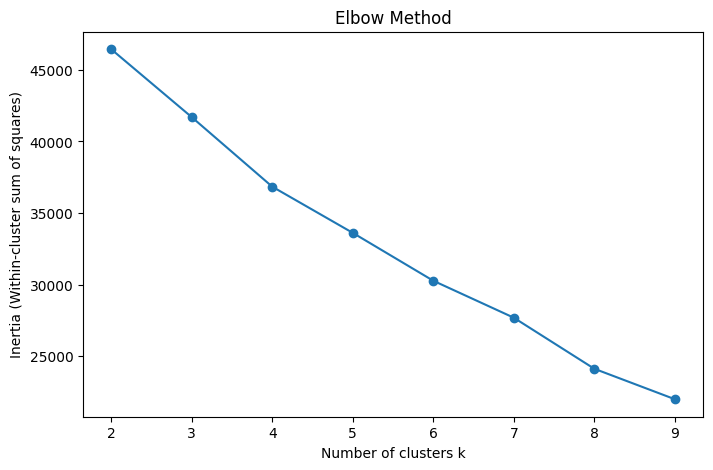

In [16]:
inertias = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_clust)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.title("Elbow Method")
plt.show()


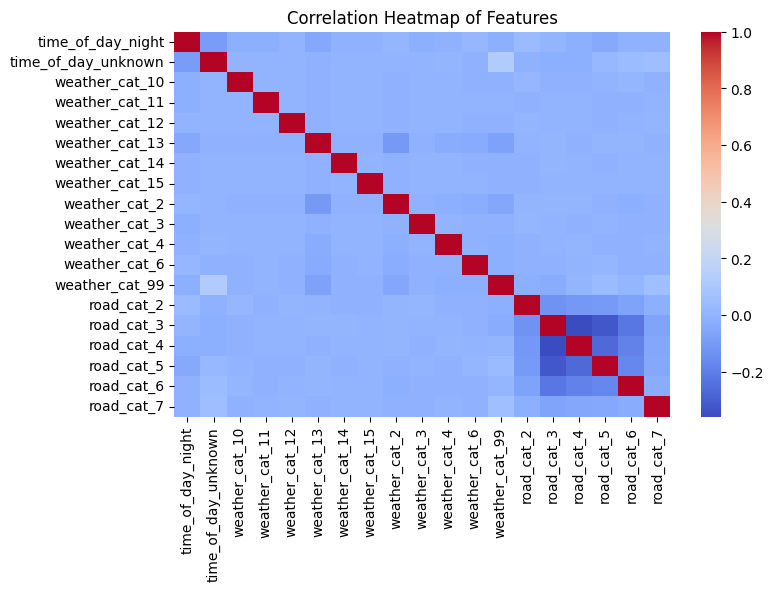

In [17]:
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()
